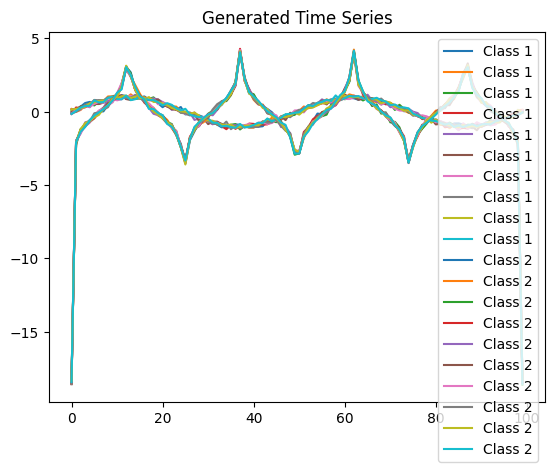

/home/alt/micromamba/lib/python3.9/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step - binary_accuracy: 0.0714 - binary_crossentropy: 0.7082 - loss: 0.7184
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.0714 - binary_crossentropy: 0.7075 - loss: 0.7176
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.0714 - binary_crossentropy: 0.7067 - loss: 0.7169
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - binary_accuracy: 0.0714 - binary_crossentropy: 0.7059 - loss: 0.7161
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.2143 - binary_crossentropy: 0.7052 - loss: 0.7154
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - binary_accuracy: 0.2143 - binary_crossentropy: 0.7045 - loss: 0.7146
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.2857 - binary_crossentropy: 0.7037 - loss: 0.7139
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.4286 - binary_crossentropy: 0.7030 - loss: 0.7131
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━

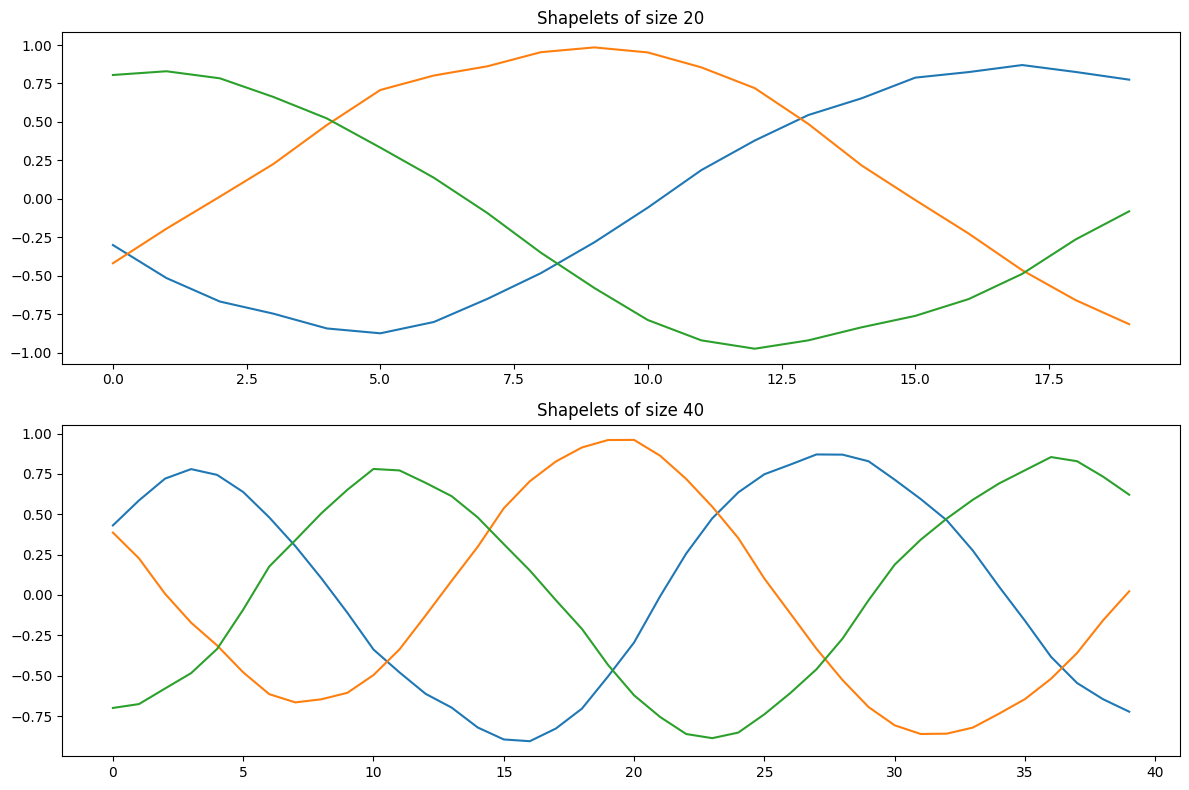

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Точность классификатора с шейплетами: 1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.preprocessing import StandardScaler

#Генерация временных рядов
np.random.seed(0)
n_series = 20
n_classes = 2
n_samples = 100
t = np.linspace(0, 4*np.pi, n_samples)

#Генерация двух различных сигналов (классов)
signals = np.empty((n_series, n_samples))
signals[:10] = np.sin(t) + np.random.normal(0, 0.1, (10, n_samples)) # класс 1
signals[10:] = np.log(np.abs(np.tan(t) + 1e-8)) + np.random.normal(0, 0.1, (10, n_samples)) # класс 2

#Выводим график сигналов
for i, signal in enumerate(signals):
    plt.plot(signal, label=f"Class {i//10+1}")
plt.legend()
plt.title("Generated Time Series")
plt.show()

#Нормализация данных
scaler = StandardScaler()
signals_scaled = scaler.fit_transform(signals)

#Ищем шейплеты
n_ts, ts_sz = signals.shape
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.2,
                                                       r=2)

shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

#Формируем датасет для обучения классификатора
labels = np.repeat(np.arange(n_classes), 10)

#Разбиваем набор на train и test
X_train, X_test, y_train, y_test = train_test_split(signals_scaled, labels, test_size=0.3, random_state=0)

#Обучаем классификатор
shp_clf.fit(X_train, y_train)

#Выводим график наиболее информативных шейплетов
plt.figure(figsize=(12, 8))
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title(f"Shapelets of size {sz}")
    for shp in shp_clf.shapelets_:
        if len(shp.ravel()) == sz:
            plt.plot(shp.ravel())
plt.tight_layout()
plt.show()

#Предсказание на тестовых данных
y_pred = shp_clf.predict(X_test)

#Описываем кратко полученные результаты
print("Точность классификатора с шейплетами:", accuracy_score(y_test, y_pred))
